In [1]:
import  scipy.signal.signaltools

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

%matplotlib inline

In [2]:
class Weierstrass():
    def __init__(self, N=1001, n_max=10, a=0.5, b=11, x_start=-2, x_stop=2):
        self.n_max = n_max
        self.a = a
        self.b = b
        self.x_start = x_start
        self.x_stop = x_stop
        self.N = N
        
        a_is_correct = 0 < self.a and self.a < 1
        b_is_correct = self.b > 0 and self.b % 2 == 1
        
        ab_is_correct = self.a * self.b > 1 + (3 * np.pi / 2)
             
        self.x, self.y = self.return_row()        
    
    def print_params(self):
        attrs = vars(self)            
        print('\n'.join([attr+" = "+str(attrs[attr]) for attr in attrs]))
        print("\na * b =", self.a * self.b, f" (ref: {(round((1 + 3 * np.pi / 2), 2))})")
    
    def elem_cos(self, x, n):
        return (self.a**n) * np.cos((self.b**n) * np.pi * x)
        
    def return_row(self):
        x = np.linspace(self.x_start, self.x_stop, self.N)
        y = sum([self.elem_cos(x, n) for n in range(self.n_max+1)])
        return x, y
    
    def plot_row(self, width=14, height=8):
        plt.figure(figsize=(width,height))
        plt.axvline(x = 0, color = 'black')
        plt.axhline(y = 0, color = 'black')
        plt.plot(self.x, self.y)

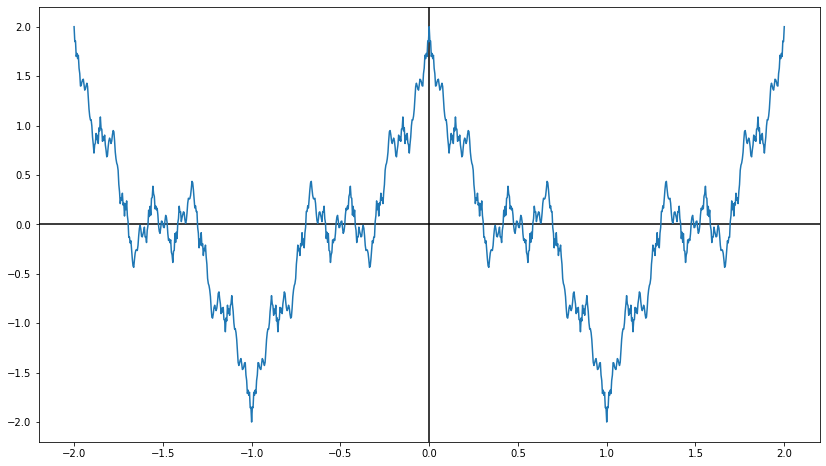

In [3]:
x_start = -2
x_stop = 2
N = 1001

w1 = Weierstrass(N=N, n_max=50, a=0.5, b=3, x_start=x_start, x_stop=x_stop)
w1.plot_row()

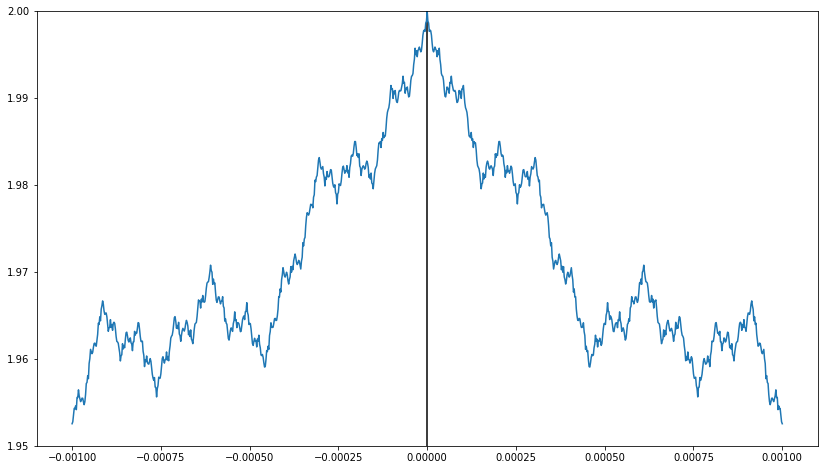

In [4]:
x_start = -0.001
x_stop = 0.001

w2 = Weierstrass(N=N, n_max=50, a=0.5, b=3, x_start=x_start, x_stop=x_stop)
x, y = w2.return_row()
plt.figure(figsize=(14,8))
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')
plt.ylim(bottom=1.95, top=2)
plt.plot(x, y)

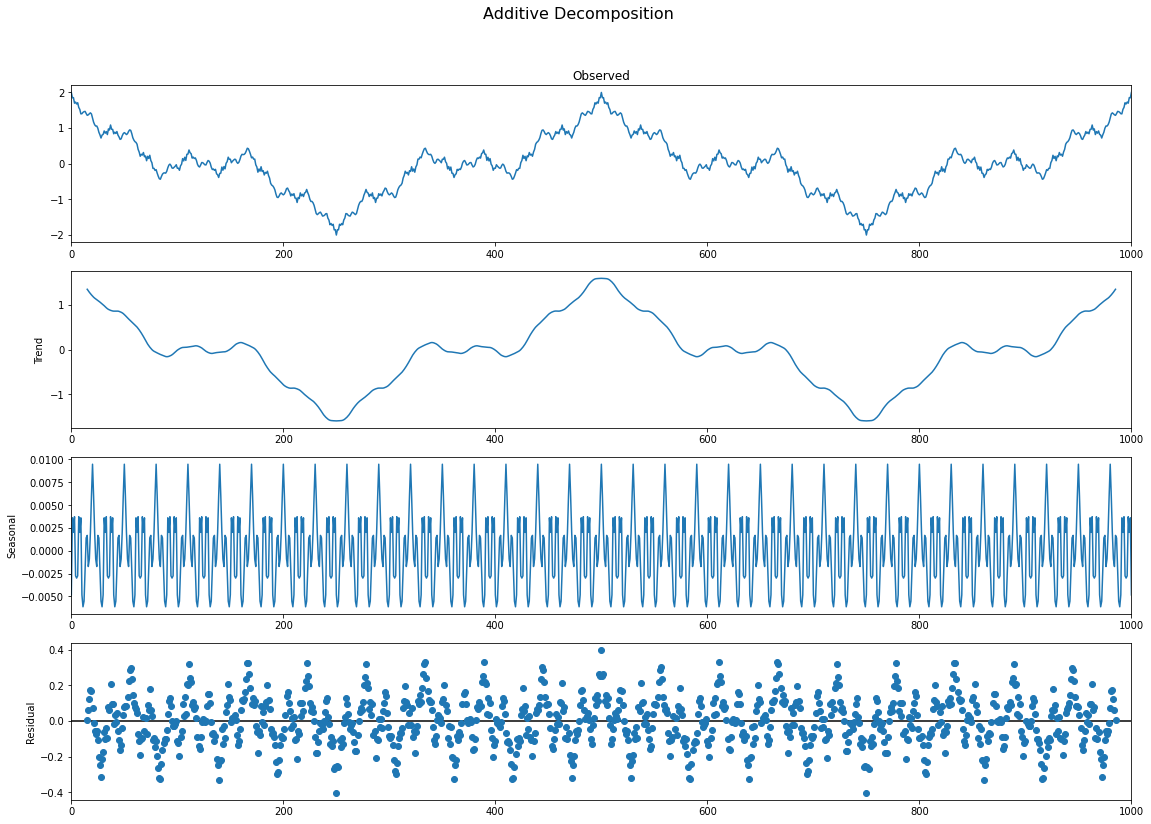

In [5]:
w_row = w1.y

additive_decomposition = seasonal_decompose(w_row, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

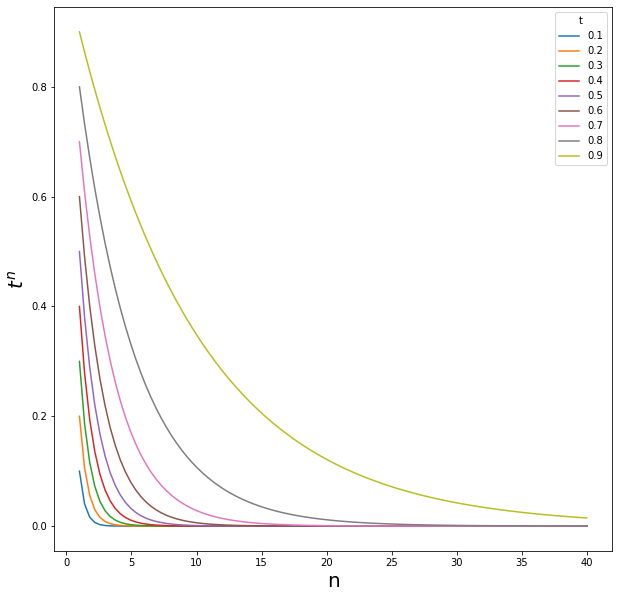

In [6]:
n = np.linspace(1, 40, 100)

plt.rcParams.update({'figure.figsize': (10,10)})
plt.ylabel(r'$t^n$', size=20)
plt.xlabel('n', size=20)

t_lst = np.linspace(0.1,0.9,9)

for t in t_lst:
    t = round(t, 1)
    u = t ** n
    plt.plot(n, u, label=str(t))
    plt.legend(title='t')

In [7]:
w2.print_params()

n_max = 50
a = 0.5
b = 3
x_start = -0.001
x_stop = 0.001
N = 1001
x = [-0.001    -0.000998 -0.000996 ...  0.000996  0.000998  0.001   ]
y = [1.95253707 1.95276142 1.95352878 ... 1.95352878 1.95276142 1.95253707]

a * b = 1.5  (ref: 5.71)
